202101544 마영준

Populating the interactive namespace from numpy and matplotlib


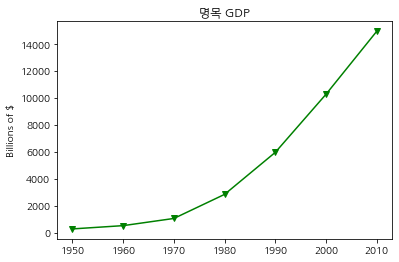

In [2]:
#1 간단한 그래프 Simple Graph : GDP by Year
import matplotlib.pyplot as plt
%pylab inline

from collections import Counter

import matplotlib
matplotlib.rc('font',family='NanumGothic') 
# 한글 폰트명은 시스템에 따라 변경 가능 
""" 그림 3-1. 간단한 선 그래프 """

def make_simple_line_chart():
    """ 그림 3-1. 간단한 선 그래프 """

    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='v', linestyle='solid')
    # makrer, linestyle등 표시 방법은 http://matplotlib.org/api/lines_api.html  참조

    # add a title
    plt.title("명목 GDP")

    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

make_simple_line_chart()


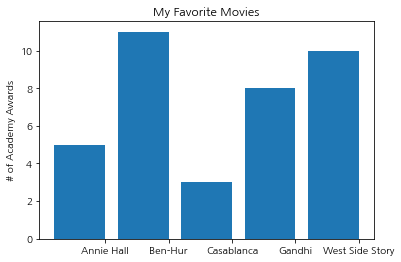

In [4]:
#2 막대 그래프 Bar Chart : Academy Awards
def make_simple_bar_chart():
    from collections import Counter

    """ 그림 3-2. 간단한 막대 그래프 """

    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    # so that each bar is centered
    xs = [i + 0.1 for i, _ in enumerate(movies)]  # 밑줄 문자 ‘_’ 좌우에 빈칸 넣어 구분
    # xs = [0.1, 1.1, 2.1, 3.1, 4.1], 일반적으로 _ 변수는 쓰지 않는 변수를 할당할 때 사용함

    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # label x-axis with movie names at bar centers
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies) # 밑줄 문자 ‘_’ 좌우에 빈칸 넣어 구분


    plt.show()
make_simple_bar_chart()

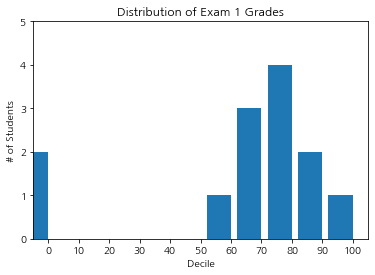

In [5]:
#3 히스토그램 Histogram : Distribution of Exam
def make_histogram():
    """ 그림 3-3. 막대 그래프로 히스토그램 그리기 """

    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10	 # 나눈 몫을 10배
    histogram = Counter(decile(grade) for grade in grades)
    # Counter([grade // 10 * 10 for grade in grades])
    # Counter({80: 4, 70: 3, 0: 2, 90: 2, 100: 1, 60: 1})

    plt.bar([x - 4 for x in histogram.keys()], 	# 각 막대를 4만큼 왼쪽으로 이동
            histogram.values(),                	#각 막대에 올바른 높이 설정
            8)                                 		# 막대의 넓이를 8로 설정
    plt.axis([-5, 105, 0, 5])                  	# x 축은 -5부터 105까지
                                               		# y 축은 0부터 5까지
    plt.xticks([10 * i for i in range(11)])    	# x 축 레이블은 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

make_histogram()

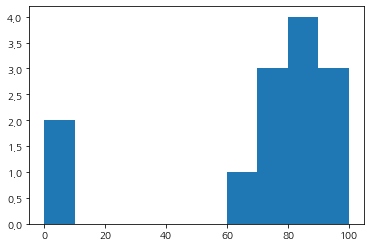

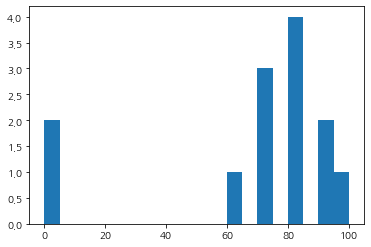

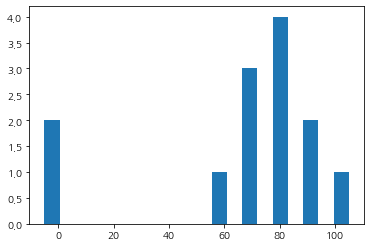

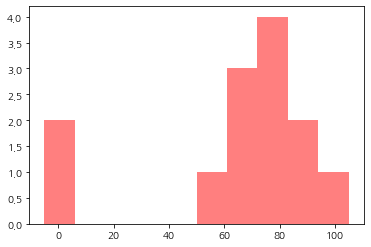

In [6]:
#3 hist() 활용 쉬운 히스토그램 Histogram : Distribution of Exam
grades = np.array([83,95,91,87,70,0,85,82,100,67,73,77,0])
grade = grades // 10 *10
plt.hist(grade);       # default bins=10
plt.show()

plt.hist(grade, bins=20);
plt.show()

plt.hist(grade, bins=20, range=(grade.min()-5, grade.max()+5));
plt.show()

plt.hist(grade, bins=10,  range=(grade.min()-5, grade.max()+5), 
         alpha=0.5, histtype='stepfilled', color='red',
         edgecolor='none');
plt.show()

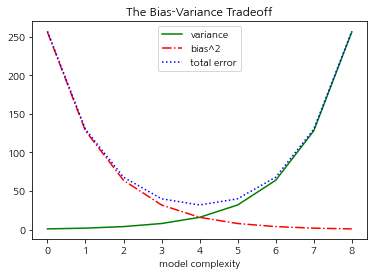

In [7]:
#4 선 그래프 Line Chart : Bias(편향)-Variance(분산) Tradeoff
def make_several_line_charts():
    """ 그림 3-6. 여러 개의 선 그래프와 범례 동시에 그리기 """

    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]
    # [257, 130, 68, 40, 32, 40, 68, 130, 257]

    xs = range(len(variance))

    # we can make multiple calls to plt.plot
    # to show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # because we've assigned labels to each series
    # we can get a legend for free
    # loc=9 means "top center"
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()

make_several_line_charts()

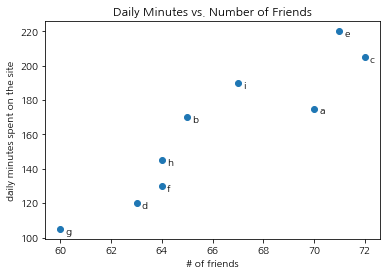

In [8]:
#5 산점도 Scatterplots 
def make_scatter_plot():
    """ 그림 3-7. 친구의 수와 사이트 체류 시간에 관한 산점도 """

    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)

    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
        	xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset, 각 점에 대한 라베링이 떨어진 거리 x축, y축
                 textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

make_scatter_plot()


Text(0, 0.5, 'y value')

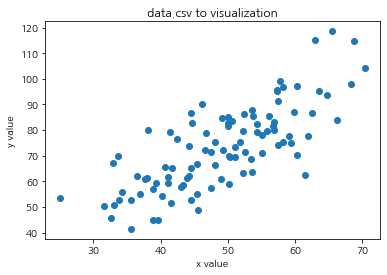

In [19]:
# data.csv 파일안의 값을 시각화
from pandas import read_csv
df = read_csv('data.csv')
data = df.values
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)
plt.title('data.csv to visualization')
plt.xlabel('x value')
plt.ylabel('y value')

202101544 마영준